## Task: Unemployment Analysis In Covid19 Times

## Importing Necessary Libraries

In [1]:
!pip -q install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.8 MB/s eta 0:00:00


In [2]:
import warnings as warn
warn.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from mpl_toolkits.mplot3d import Axes3D

## Data Analysis

## DF1 Deals Beforemath of Unemployment before Corona

## Reading Data

In [3]:
df1 = pd.read_excel('/content/Unemployment in India.xlsx')

## Basic Stats Of Data

In [4]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df1.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [7]:
df1.isna().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [8]:
df1 = df1.dropna()

In [9]:
df1.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [10]:
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [11]:
df1.shape

(740, 7)

In [12]:
df1['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [13]:
len(df1['Region'].unique())

28

In [14]:
df1['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

In [15]:
df1[df1['Region']=='Andhra Pradesh'].Area.unique()

array(['Rural', 'Urban'], dtype=object)

In [16]:
df1['Date'].unique()

array(['31-05-2019', '30-06-2019', '31-07-2019', '31-08-2019',
       '30-09-2019', '31-10-2019', '30-11-2019', '31-12-2019',
       '31-01-2020', '29-02-2020', '31-03-2020', '30-04-2020',
       '31-05-2020', '30-06-2020'], dtype=object)

## Let's try to analyze the Unemployment rate of each state


In [17]:
df1.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [18]:
df1_states = list(df1['Region'].unique())
state_vs_avg_unenmployment_rate_in_rural = {state: df1[df1['Region']==state][df1['Area']=='Rural']['Estimated Unemployment Rate (%)'].mean() for state in df1_states}

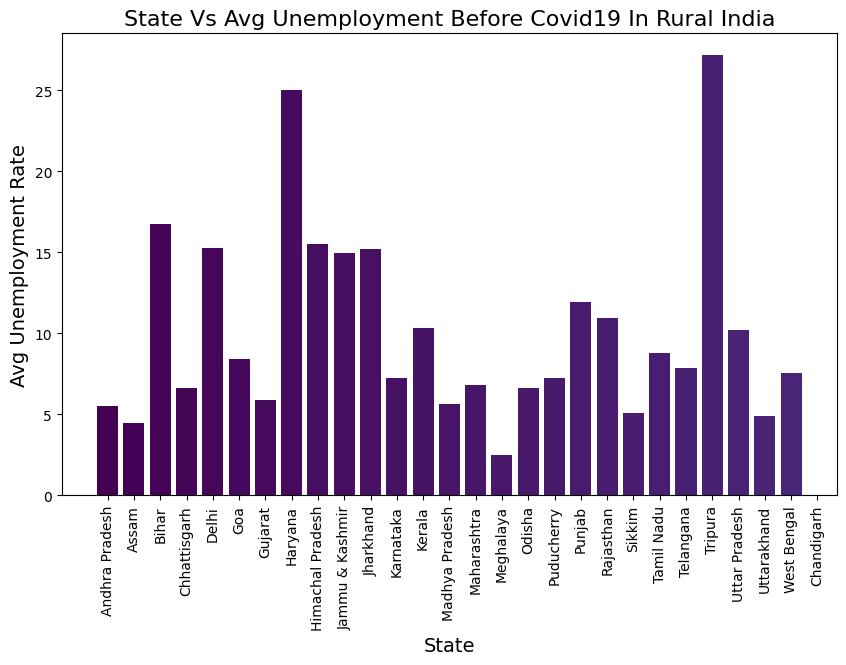

In [20]:
categories = list(state_vs_avg_unenmployment_rate_in_rural.keys())
values = list(state_vs_avg_unenmployment_rate_in_rural.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('State Vs Avg Unemployment Before Covid19 In Rural India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Unemployment Rate', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [21]:
state_vs_avg_unenmployment_rate_in_urban = {state: df1[df1['Region']==state][df1['Area']=='Urban']['Estimated Unemployment Rate (%)'].mean() for state in df1_states}

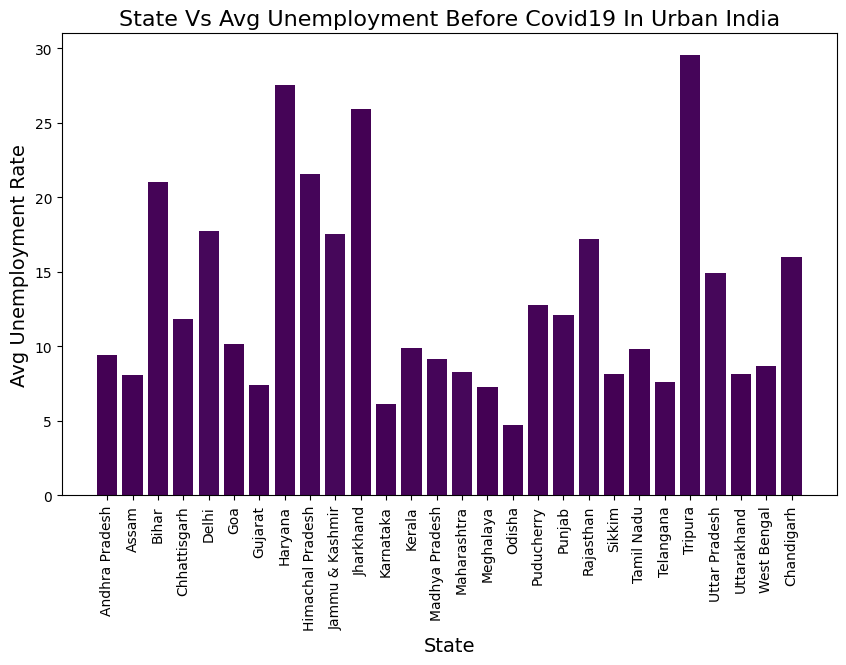

In [107]:
categories = list(state_vs_avg_unenmployment_rate_in_urban.keys())
values = list(state_vs_avg_unenmployment_rate_in_urban.values())
plt.figure(figsize=(10, 6))
plt.bar(categories, values,color = colors)
plt.title('State Vs Avg Unemployment Before Covid19 In Urban India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Unemployment Rate', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [24]:
state_vs_avg_employed_in_rural = {state: df1[df1['Region']==state][df1['Area']=='Rural']['Estimated Employed'].mean() for state in df1_states}

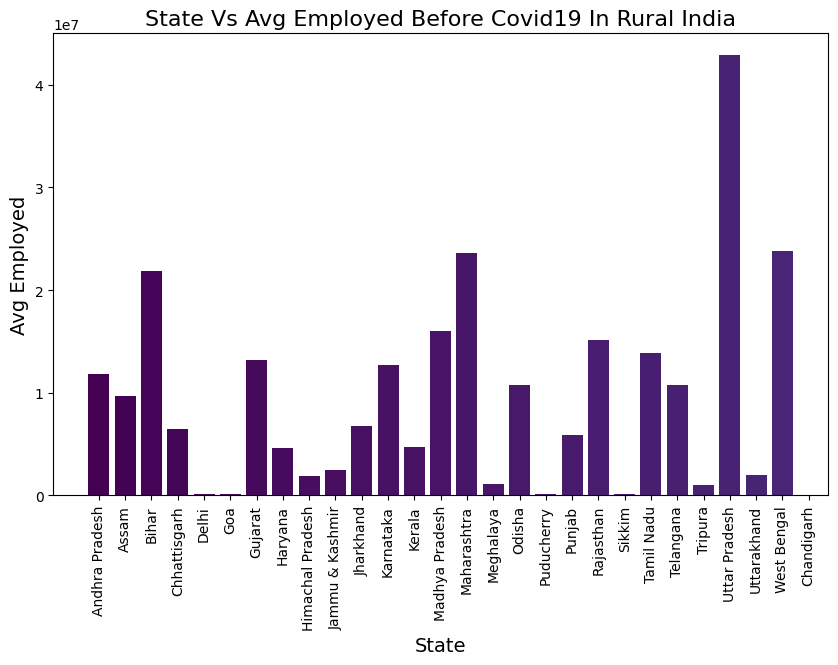

In [26]:
categories = list(state_vs_avg_employed_in_rural.keys())
values = list(state_vs_avg_employed_in_rural.values())
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('State Vs Avg Employed Before Covid19 In Rural India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Employed', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [27]:
state_vs_avg_employed_in_urban = {state: df1[df1['Region']==state][df1['Area']=='Urban']['Estimated Employed'].mean() for state in df1_states}

In [28]:
state_vs_avg_employed_in_urban

{'Andhra Pradesh': 4499591.571428572,
 'Assam': 1616047.5,
 'Bihar': 2888684.0714285714,
 'Chhattisgarh': 2105312.714285714,
 'Delhi': 5106776.428571428,
 'Goa': 284370.5833333333,
 'Gujarat': 9577274.857142856,
 'Haryana': 2464366.8571428573,
 'Himachal Pradesh': 222281.35714285713,
 'Jammu & Kashmir': 1099388.0,
 'Jharkhand': 2176129.714285714,
 'Karnataka': 8663219.57142857,
 'Kerala': 4181042.3571428573,
 'Madhya Pradesh': 6246024.214285715,
 'Maharashtra': 16354233.142857144,
 'Meghalaya': 247925.38461538462,
 'Odisha': 2344519.5,
 'Puducherry': 257714.92857142858,
 'Punjab': 3233477.3571428573,
 'Rajasthan': 4981386.428571428,
 'Sikkim': 89291.58333333333,
 'Tamil Nadu': 10641472.285714285,
 'Telangana': 5093399.214285715,
 'Tripura': 404258.0714285714,
 'Uttar Pradesh': 13322807.07142857,
 'Uttarakhand': 839111.8571428572,
 'West Bengal': 10606834.285714285,
 'Chandigarh': 316831.25}

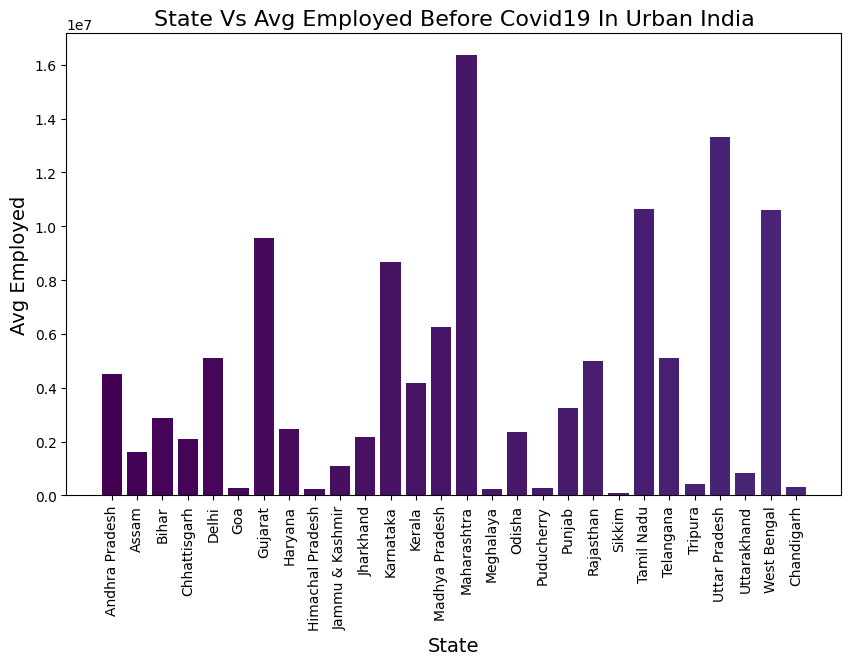

In [29]:
categories = list(state_vs_avg_employed_in_urban.keys())
values = list(state_vs_avg_employed_in_urban.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('State Vs Avg Employed Before Covid19 In Urban India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Employed', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [30]:
state_vs_avg_labour_force_in_rural = {state: df1[df1['Region']==state][df1['Area']=='Rural']['Estimated Labour Participation Rate (%)'].mean() for state in df1_states}

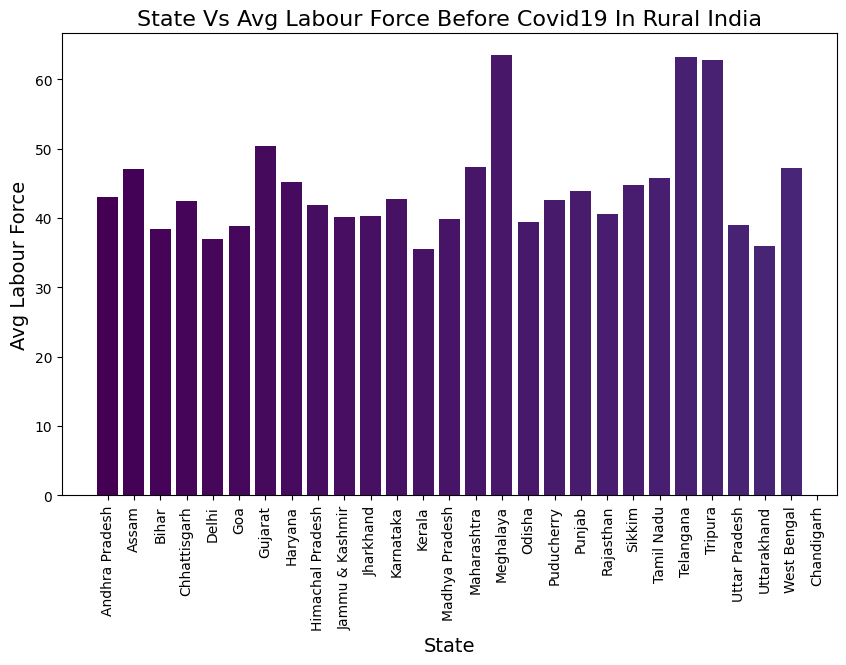

In [32]:
categories = list(state_vs_avg_labour_force_in_rural.keys())
values = list(state_vs_avg_labour_force_in_rural.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('State Vs Avg Labour Force Before Covid19 In Rural India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Labour Force', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [33]:
state_vs_avg_labour_force_in_urban = {state: df1[df1['Region']==state][df1['Area']=='Urban']['Estimated Labour Participation Rate (%)'].mean() for state in df1_states}

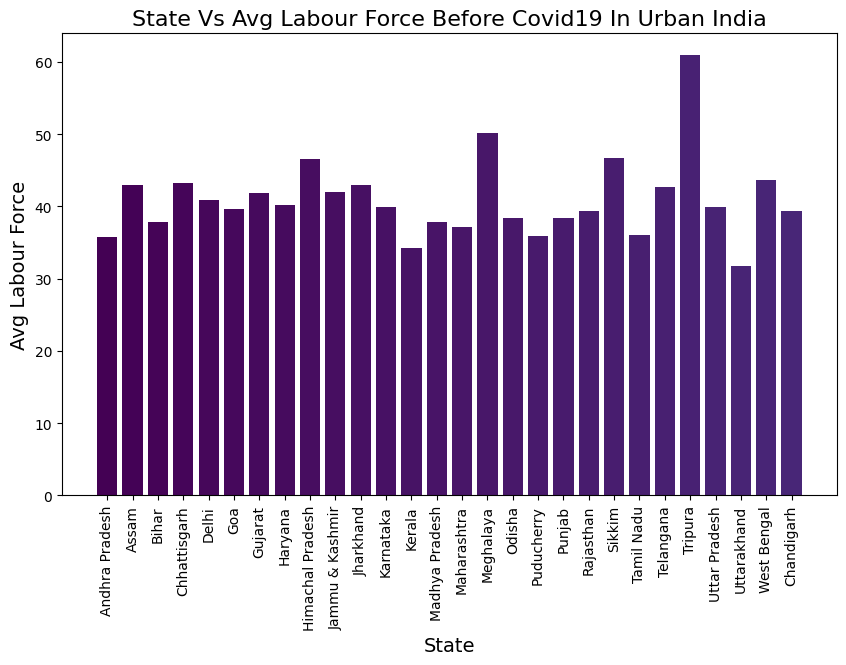

In [35]:
categories = list(state_vs_avg_labour_force_in_urban.keys())
values = list(state_vs_avg_labour_force_in_urban.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('State Vs Avg Labour Force Before Covid19 In Urban India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Labour Force', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [36]:
df1_areas = df1.Area.unique()
area_vs_avg_unemployment_rate = {area: df1[df1['Area']==area]['Estimated Unemployment Rate (%)'].mean() for area in df1_areas}

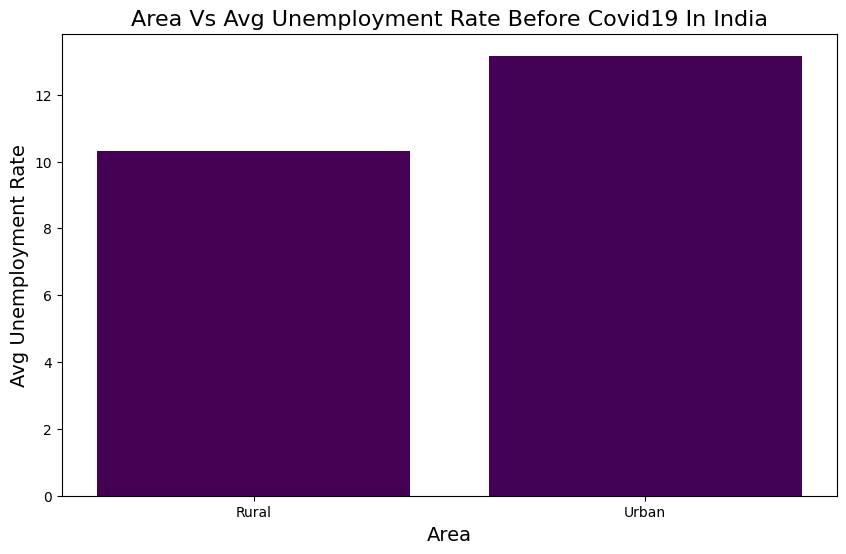

In [38]:
categories = list(area_vs_avg_unemployment_rate.keys())
values = list(area_vs_avg_unemployment_rate.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Area Vs Avg Unemployment Rate Before Covid19 In India', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Avg Unemployment Rate', fontsize=14)
plt.show()

In [39]:
area_vs_avg_estimated_employed = {area: df1[df1['Area']==area]['Estimated Employed'].mean() for area in df1_areas}

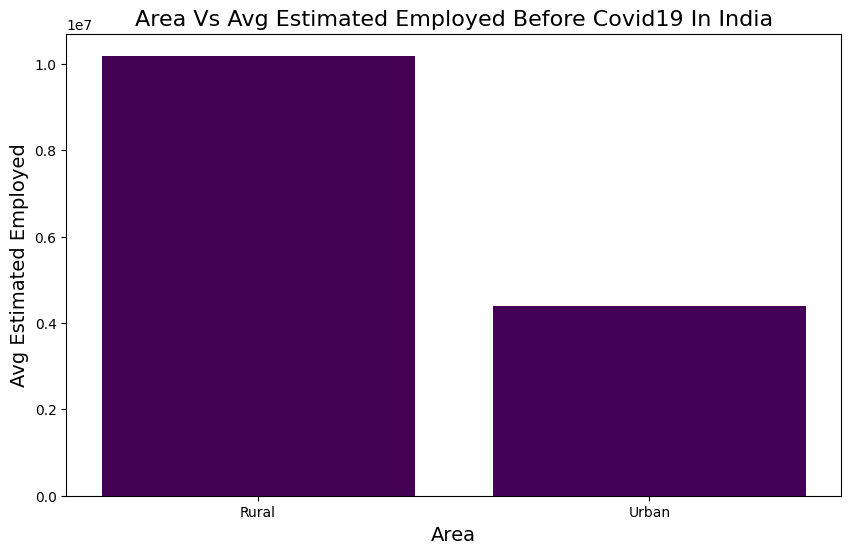

In [41]:
ategories = list(area_vs_avg_estimated_employed.keys())
values = list(area_vs_avg_estimated_employed.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Area Vs Avg Estimated Employed Before Covid19 In India', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Avg Estimated Employed', fontsize=14)
plt.show()

In [42]:
area_vs_avg_labour_force = {area: df1[df1['Area']==area]['Estimated Labour Participation Rate (%)'].mean() for area in df1_areas}

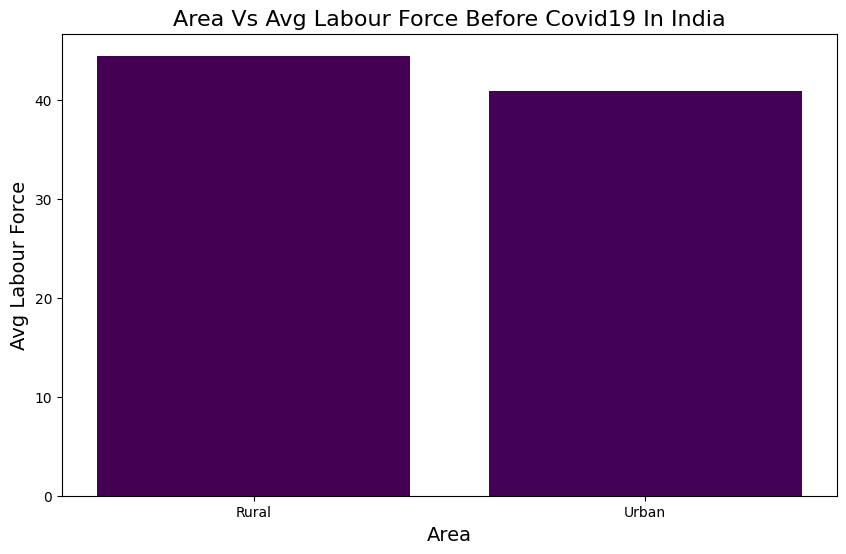

In [43]:
ategories = list(area_vs_avg_labour_force.keys())
values = list(area_vs_avg_labour_force.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Area Vs Avg Labour Force Before Covid19 In India', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Avg Labour Force', fontsize=14)
plt.show()

In [45]:
df1_dates = list(df1.Date.unique())

In [46]:
date_vs_avg_unemployment_rate = {date: df1[df1['Date']==date]['Estimated Unemployment Rate (%)'].mean() for date in df1_dates}

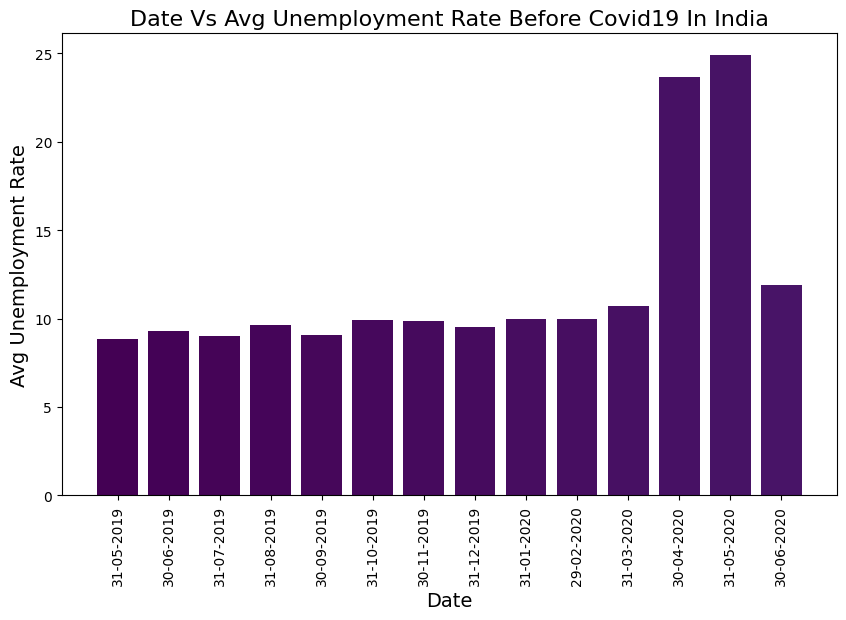

In [78]:
categories = list(date_vs_avg_unemployment_rate.keys())
values = list(date_vs_avg_unemployment_rate.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Date Vs Avg Unemployment Rate Before Covid19 In India', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Avg Unemployment Rate', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [49]:
date_vs_avg_estimated_employed = {date: df1[df1['Date']==date]['Estimated Employed'].mean() for date in df1_dates}

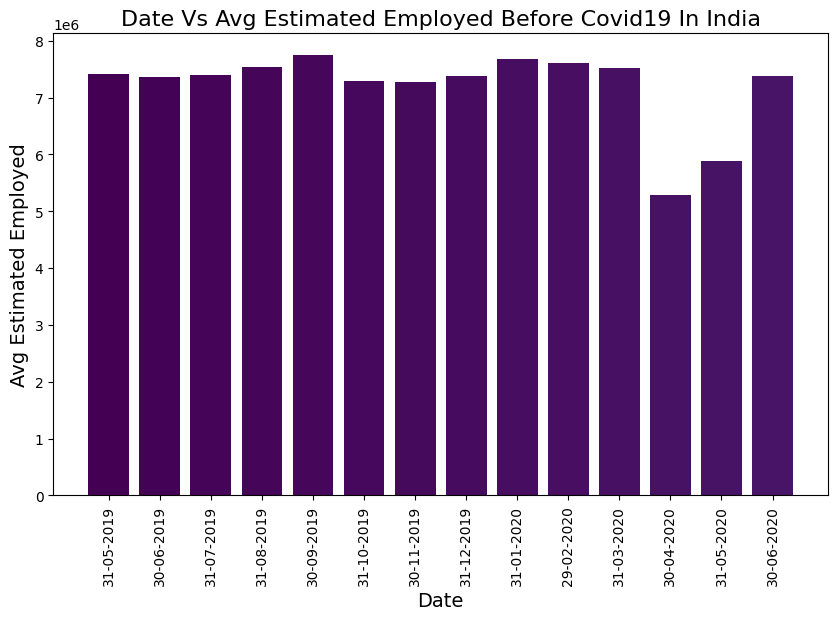

In [77]:
categories = list(date_vs_avg_estimated_employed.keys())
values = list(date_vs_avg_estimated_employed.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Date Vs Avg Estimated Employed Before Covid19 In India', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Avg Estimated Employed', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [52]:
date_vs_avg_labour_force= {date: df1[df1['Date']==date]['Estimated Labour Participation Rate (%)'].mean() for date in df1_dates}

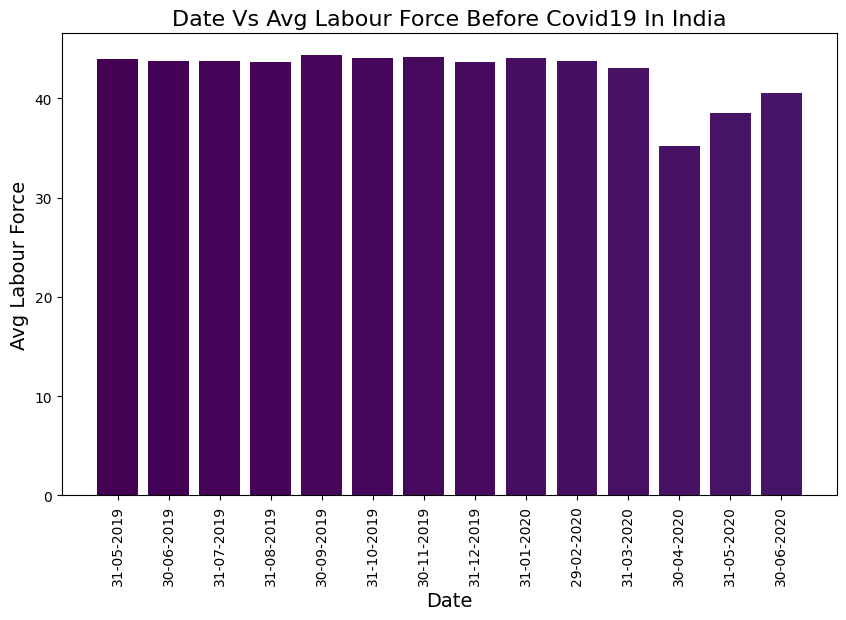

In [76]:
categories = list(date_vs_avg_labour_force.keys())
values = list(date_vs_avg_labour_force.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Date Vs Avg Labour Force Before Covid19 In India', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Avg Labour Force', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

### DF2 Deals Aftermath of Employment after COVID19

### Loading Data

In [55]:
df2 = pd.read_excel('/content/Unemployment_Rate_upto_11_2020.xlsx')

### Basic Stats of Data

In [56]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [57]:
df2.shape

(267, 9)

In [58]:
df2.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'Longitude', 'Latitude'],
      dtype='object')

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [60]:
df2.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64

In [61]:
df2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [62]:
df2['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [63]:
df2['Region'].value_counts()

Region
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [64]:
df2['Region.1'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [65]:
df2['Region.1'].value_counts()

Region.1
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64

In [66]:
df2['Date'].unique()

array(['31-01-2020', '29-02-2020', '31-03-2020', '30-04-2020',
       '31-05-2020', '30-06-2020', '31-07-2020', '31-08-2020',
       '30-09-2020', '31-10-2020'], dtype=object)

In [69]:
df2['Longitude'].unique()

array([15.9129, 26.2006, 25.0961, 21.2787, 28.7041, 15.2993, 22.2587,
       29.0588, 31.1048, 33.7782, 23.6102, 15.3173, 10.8505, 22.9734,
       19.7515, 25.467 , 20.9517, 11.9416, 31.1471, 27.0238, 27.533 ,
       11.1271, 18.1124, 23.9408, 26.8467, 30.0668, 22.9868])

In [70]:
df2['Latitude'].unique()

array([79.74  , 92.9376, 85.3131, 81.8661, 77.1025, 74.124 , 71.1924,
       76.0856, 77.1734, 76.5762, 85.2799, 75.7139, 76.2711, 78.6569,
       91.3662, 85.0985, 79.8083, 75.3412, 74.2179, 88.5122, 79.0193,
       91.9882, 80.9462, 87.855 ])

In [72]:
df2.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'Longitude', 'Latitude'],
      dtype='object')

In [71]:
df2_states = list(df2['Region'].unique())
state_region_dict = {state : df2[df2['Region']==state]['Region.1'].unique()[0] for state in df2['Region'].unique()}

In [74]:
state_vs_avg_unemployment_rate = {state: df2[df2['Region']==state]['Estimated Unemployment Rate (%)'].mean() for state in df2_states}

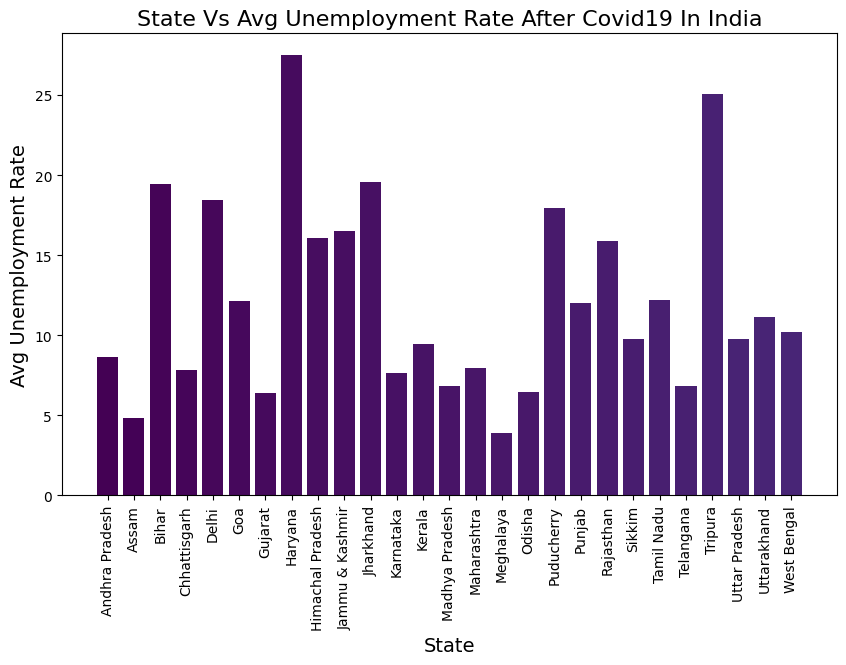

In [79]:
categories = list(state_vs_avg_unemployment_rate.keys())
values = list(state_vs_avg_unemployment_rate.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('State Vs Avg Unemployment Rate After Covid19 In India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Unemployment Rate', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [80]:
state_vs_avg_estimated_employed = {state: df2[df2['Region']==state]['Estimated Employed'].mean() for state in df2_states}

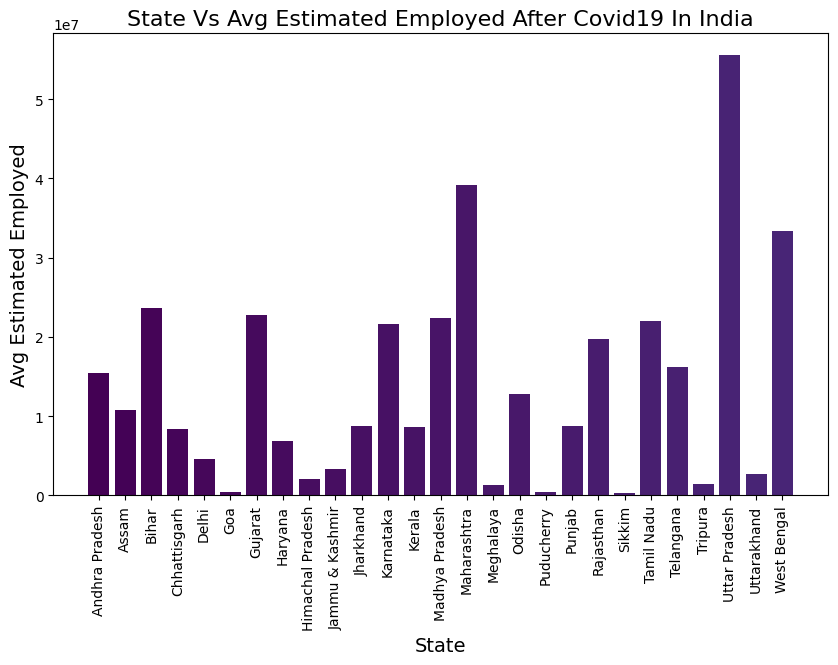

In [83]:
categories = list(state_vs_avg_estimated_employed.keys())
values = list(state_vs_avg_estimated_employed.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('State Vs Avg Estimated Employed After Covid19 In India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Estimated Employed', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [86]:
state_vs_avg_labour_force = {state: df2[df2['Region']==state]['Estimated Labour Participation Rate (%)'].mean() for state in df2_states}

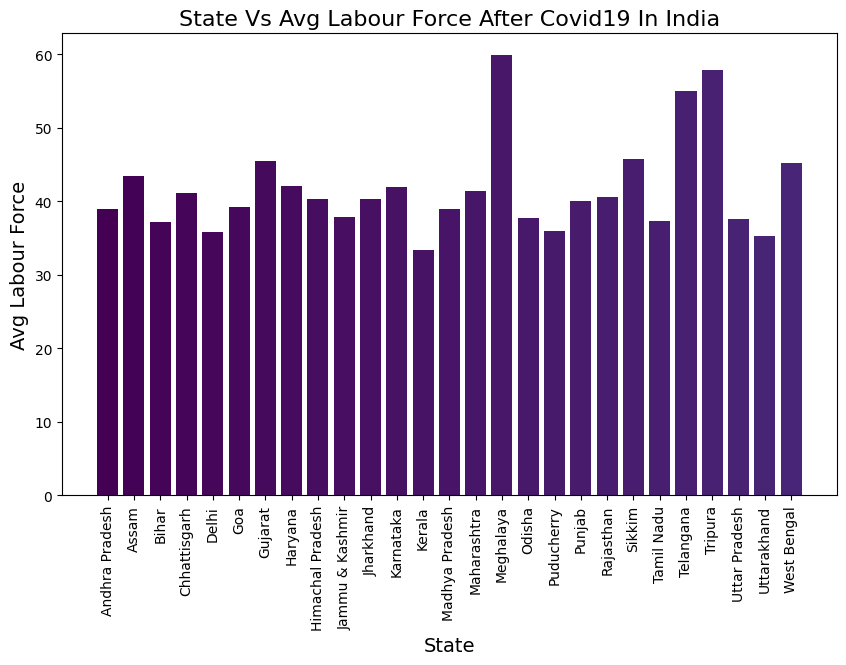

In [96]:
categories = list(state_vs_avg_labour_force.keys())
values = list(state_vs_avg_labour_force.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('State Vs Avg Labour Force After Covid19 In India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Labour Force', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [93]:
df2_regions = list(df2['Region.1'].unique())

In [94]:
region_vs_avg_unemployment_rate = {region: df2[df2['Region.1']==region]['Estimated Unemployment Rate (%)'].mean() for region in df2_regions}

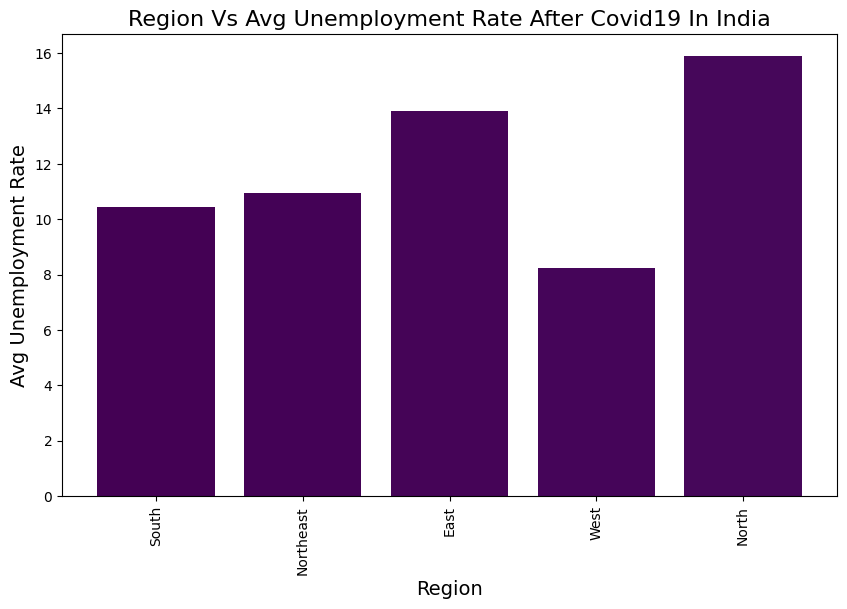

In [97]:
categories = list(region_vs_avg_unemployment_rate.keys())
values = list(region_vs_avg_unemployment_rate.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Region Vs Avg Unemployment Rate After Covid19 In India', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Avg Unemployment Rate', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [98]:
region_vs_avg_estimated_employed = {region: df2[df2['Region.1']==region]['Estimated Employed'].mean() for region in df2_regions}

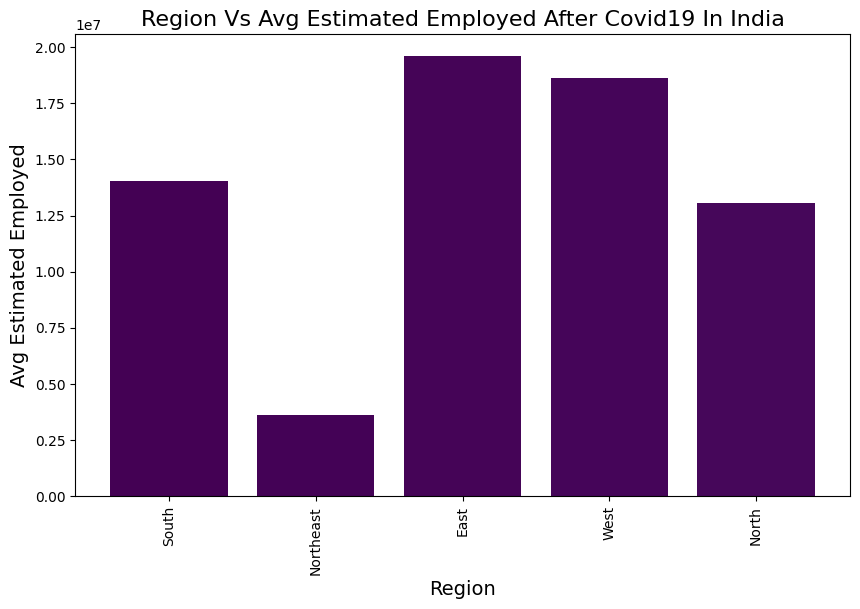

In [101]:
categories = list(region_vs_avg_estimated_employed.keys())
values = list(region_vs_avg_estimated_employed.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Region Vs Avg Estimated Employed After Covid19 In India', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Avg Estimated Employed', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [104]:
region_vs_avg_labour_force = {region: df2[df2['Region.1']==region]['Estimated Labour Participation Rate (%)'].mean() for region in df2_regions}

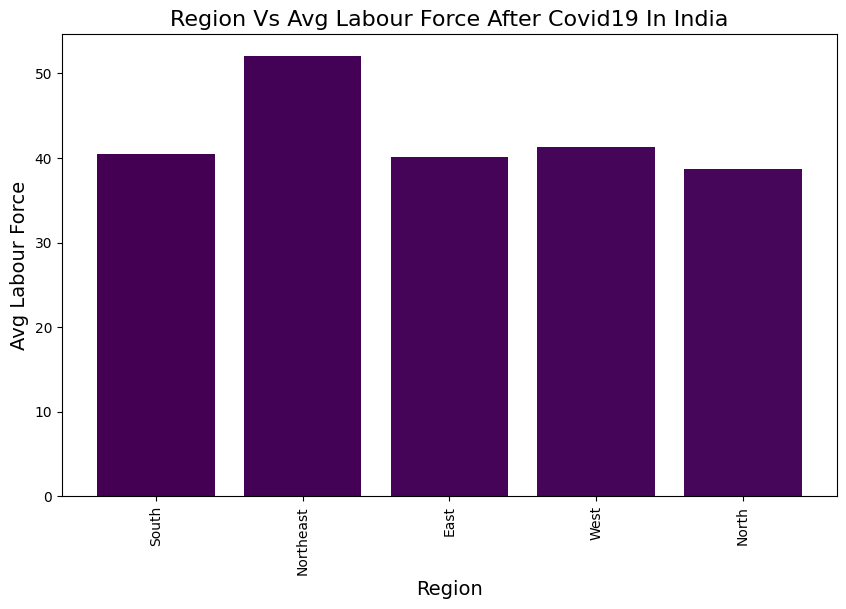

In [106]:
categories = list(region_vs_avg_labour_force.keys())
values = list(region_vs_avg_labour_force.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Region Vs Avg Labour Force After Covid19 In India', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Avg Labour Force', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [108]:
df2_dates = list(df2['Date'].unique())

In [113]:
date_vs_avg_unemployment_rate = {date: df2[df2['Date']==date]['Estimated Unemployment Rate (%)'].mean() for date in df2_dates}

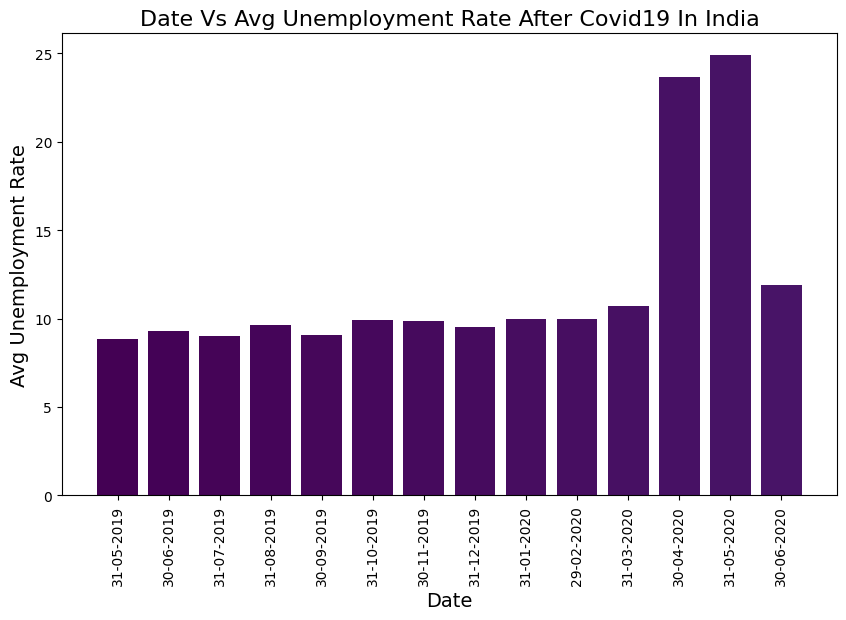

In [114]:
categories = list(date_vs_avg_unemployment_rate.keys())
values = list(date_vs_avg_unemployment_rate.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Date Vs Avg Unemployment Rate After Covid19 In India', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Avg Unemployment Rate', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [115]:
date_vs_avg_estimated_employed = {date: df2[df2['Date']==date]['Estimated Employed'].mean() for date in df2_dates}

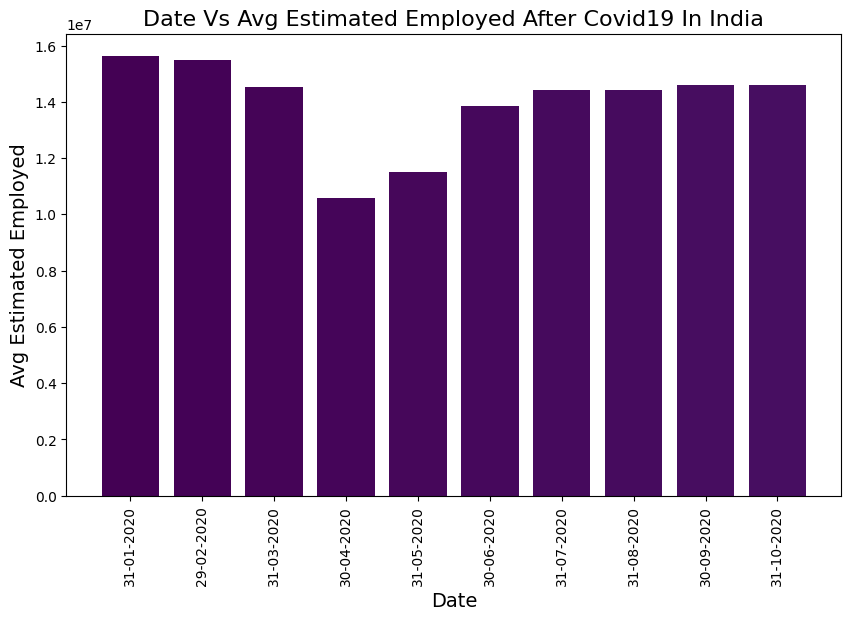

In [116]:
categories = list(date_vs_avg_estimated_employed.keys())
values = list(date_vs_avg_estimated_employed.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Date Vs Avg Estimated Employed After Covid19 In India', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Avg Estimated Employed', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [117]:
date_vs_avg_labour_force = {date: df2[df2['Date']==date]['Estimated Labour Participation Rate (%)'].mean() for date in df2_dates}

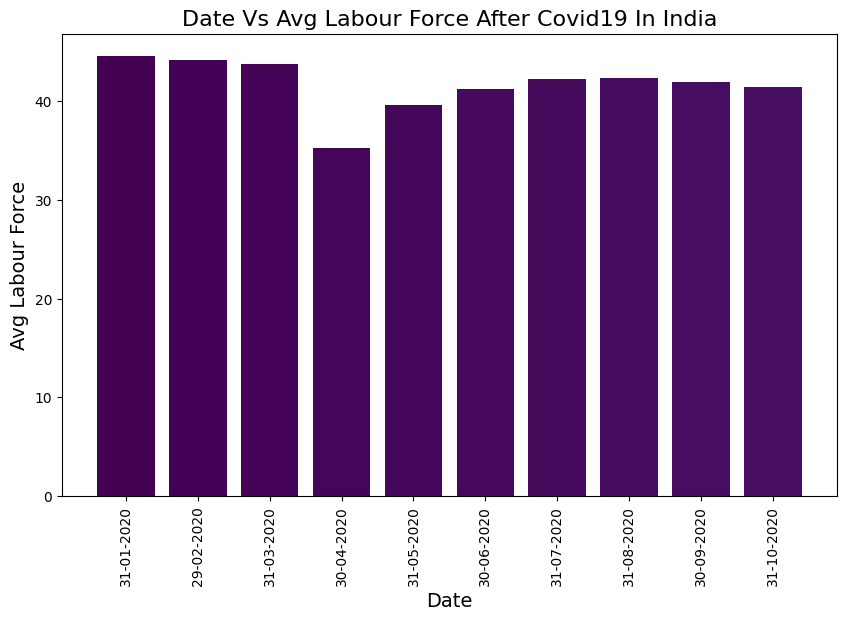

In [118]:
categories = list(date_vs_avg_labour_force.keys())
values = list(date_vs_avg_labour_force.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('Date Vs Avg Labour Force After Covid19 In India', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Avg Labour Force', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [119]:
df2.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'Longitude', 'Latitude'],
      dtype='object')

In [124]:
state_vs_avg_unmployment_rate_trend= {state: df2[df2['Region']==state]['Estimated Unemployment Rate (%)'].mean() - df1[df1['Region']==state]['Estimated Unemployment Rate (%)'].mean() for state in df2_states}

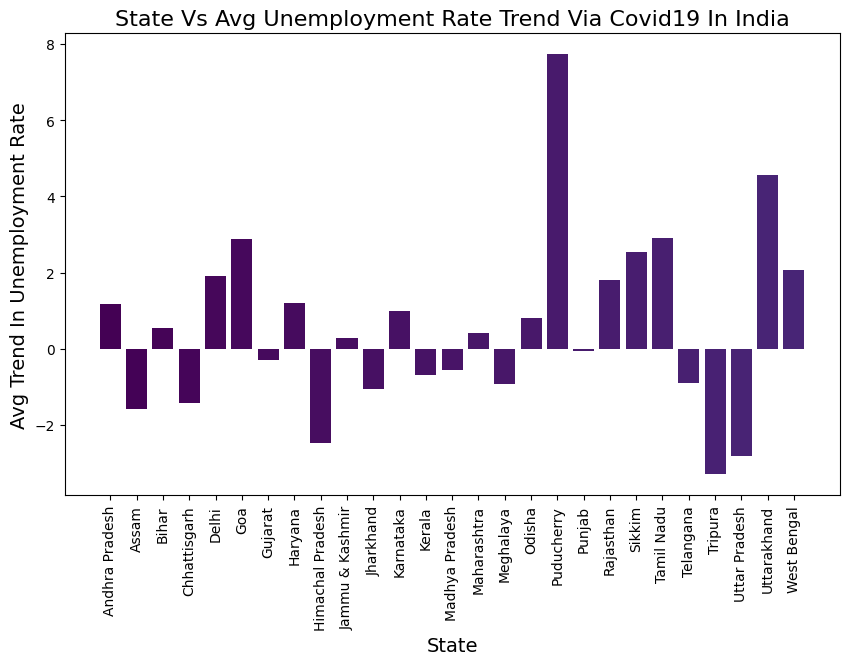

In [128]:
categories = list(state_vs_avg_unmployment_rate_trend.keys())
values = list(state_vs_avg_unmployment_rate_trend.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('State Vs Avg Unemployment Rate Trend Via Covid19 In India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Trend In Unemployment Rate', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [131]:
state_vs_avg_estimated_employed_trend= {state:  df2[df2['Region']==state]['Estimated Employed'].mean() - df1[df1['Region']==state]['Estimated Employed'].mean() for state in df2_states}

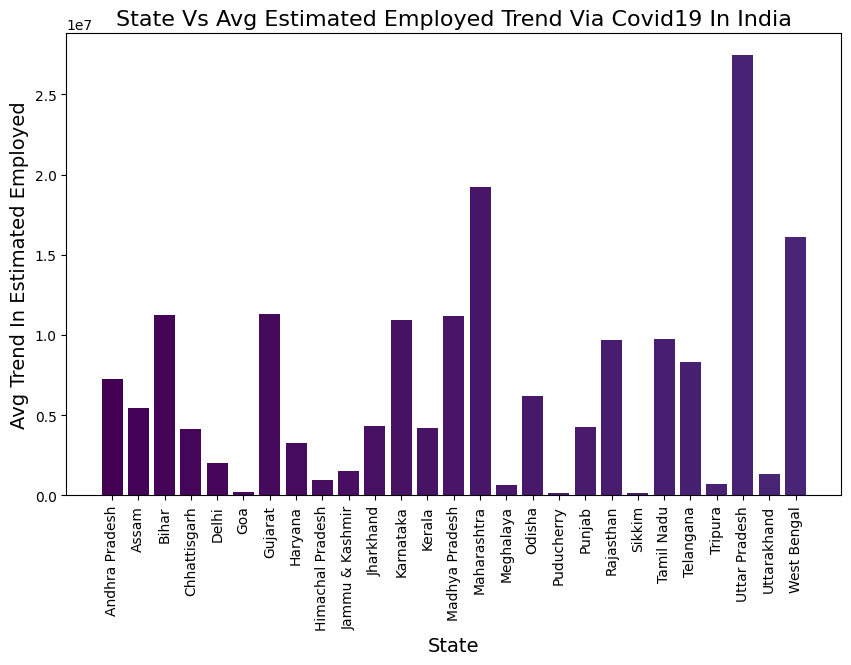

In [132]:
categories = list(state_vs_avg_estimated_employed_trend.keys())
values = list(state_vs_avg_estimated_employed_trend.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('State Vs Avg Estimated Employed Trend Via Covid19 In India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Trend In Estimated Employed', fontsize=14)
plt.xticks(rotation = 90)
plt.show()

In [136]:
state_vs_avg_labour_force_trend = {state:  df2[df2['Region']==state]['Estimated Labour Participation Rate (%)'].mean() - df1[df1['Region']==state]['Estimated Labour Participation Rate (%)'].mean() for state in df2_states}

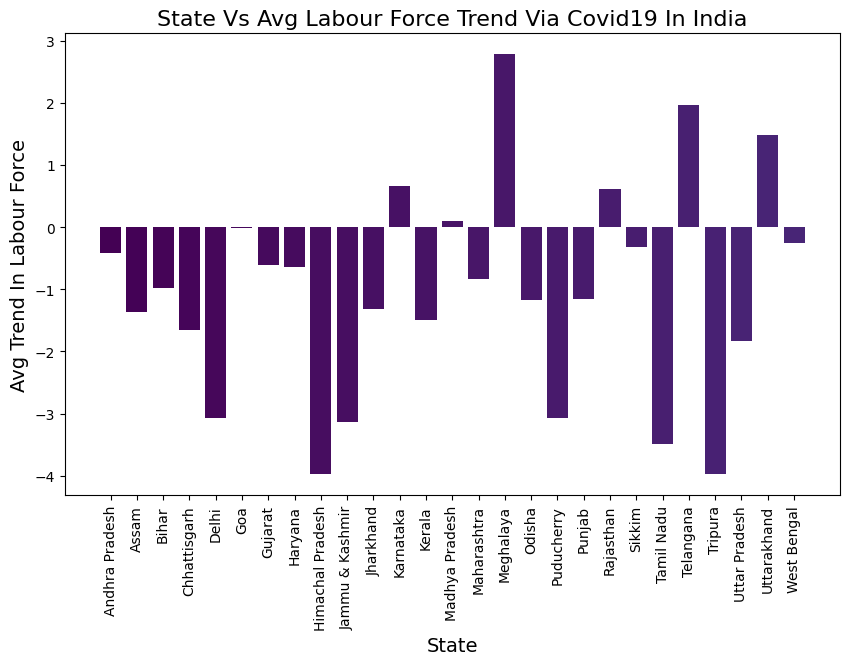

In [137]:
categories = list(state_vs_avg_labour_force_trend.keys())
values = list(state_vs_avg_labour_force_trend.values())
colors = plt.cm.viridis(range(len(categories)))
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.title('State Vs Avg Labour Force Trend Via Covid19 In India', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Avg Trend In Labour Force', fontsize=14)
plt.xticks(rotation = 90)
plt.show()